In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [ ]:
from collections import defaultdict

In [ ]:
data = pd.read_csv('./wisc_bc_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766



*   The dataset contains 30 feature columns and all of them hold numerical statistical values.
*   The target variable is named as 'diagnosis' where B means benign and M means Malignant.

In [ ]:
data.shape

(569, 32)

The whole dataset contains 32 columns in total; 30 feature columns and 1 target variable column and 1 ID column. A total of 569 records (datapoints) are available.

In [ ]:
set(data['diagnosis'])

{'B', 'M'}

From the above, it can be seen that the target variable has two categories namely, 'B' meaning Benign and 'M' meaning Malignant.

In [ ]:
for col in data.columns.values:
  un = set(data[col])
  null = sum(pd.isna(data[col]))
  print(col + ' : datatype is ' + str(data[col].dtypes) + ' and has: ')
  print(str(len(un)) + ' unique values and ' + str(null) + ' null values.')
  print(end='\n')

cat_data = [col for col in data.columns.values if data[col].dtypes=='object']
print('Total number of columns with object data: ', len(cat_data))

id : datatype is int64 and has: 
569 unique values and 0 null values.

diagnosis : datatype is object and has: 
2 unique values and 0 null values.

radius_mean : datatype is float64 and has: 
456 unique values and 0 null values.

texture_mean : datatype is float64 and has: 
479 unique values and 0 null values.

perimeter_mean : datatype is float64 and has: 
522 unique values and 0 null values.

area_mean : datatype is float64 and has: 
539 unique values and 0 null values.

smoothness_mean : datatype is float64 and has: 
474 unique values and 0 null values.

compactness_mean : datatype is float64 and has: 
537 unique values and 0 null values.

concavity_mean : datatype is float64 and has: 
537 unique values and 0 null values.

points_mean : datatype is float64 and has: 
542 unique values and 0 null values.

symmetry_mean : datatype is float64 and has: 
432 unique values and 0 null values.

dimension_mean : datatype is float64 and has: 
499 unique values and 0 null values.

radius_se : d

From the above output, the major insights found are:


*   There is only 1 column with object/categorical data type i.e., target variable 'diagnosis'.
*   There is no column with null values. 



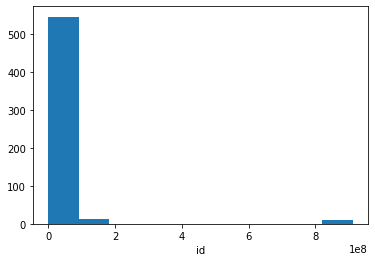

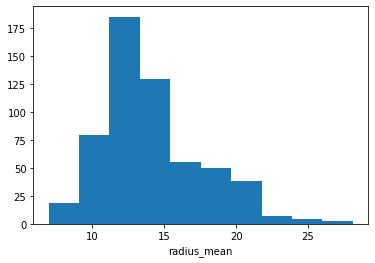

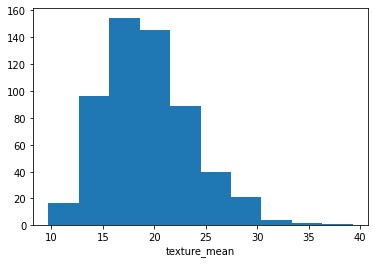

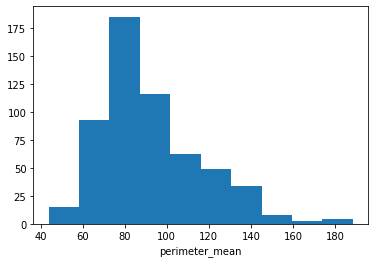

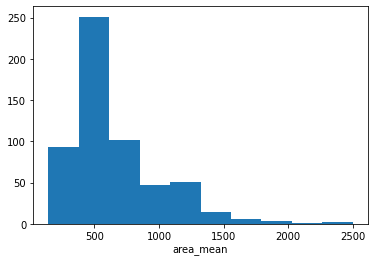

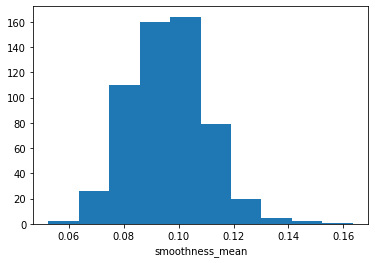

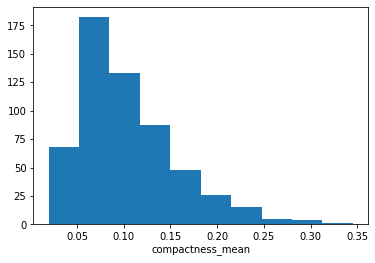

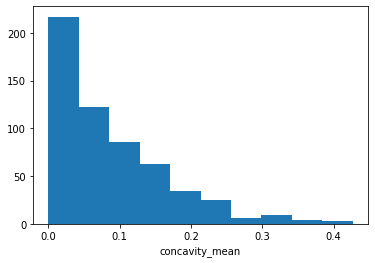

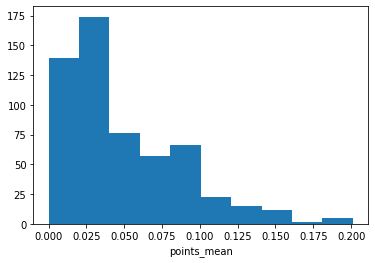

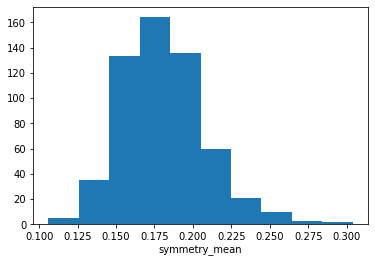

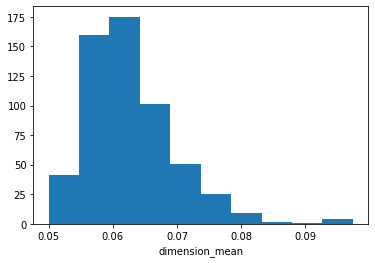

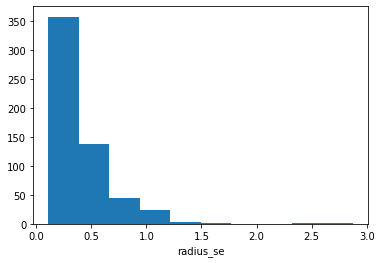

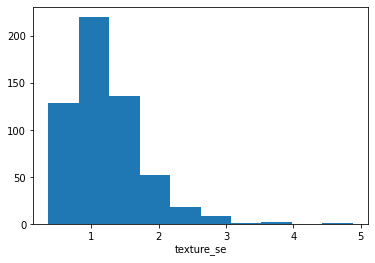

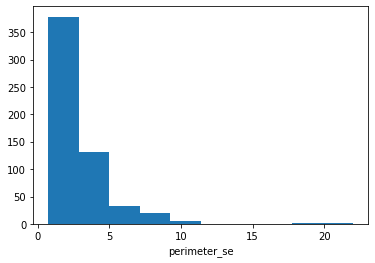

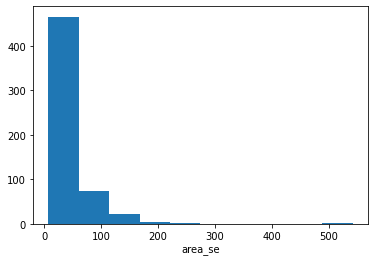

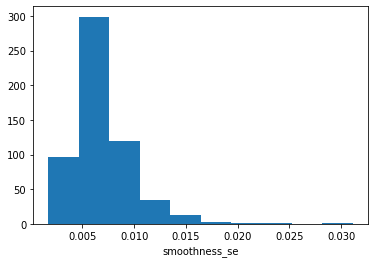

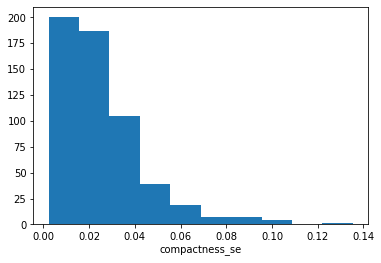

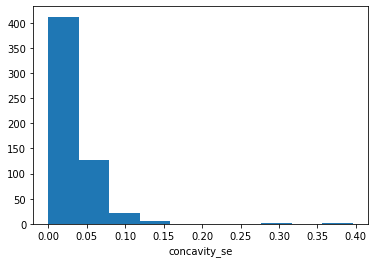

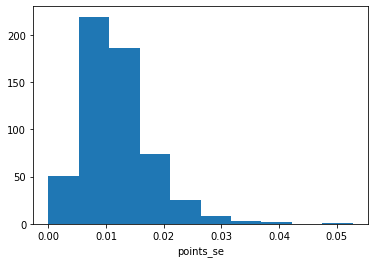

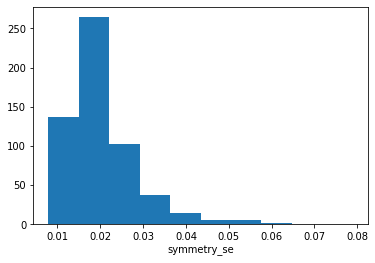

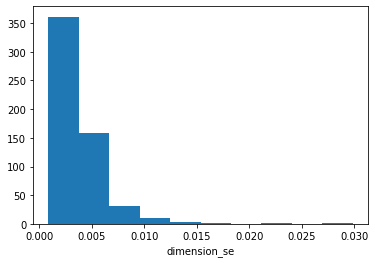

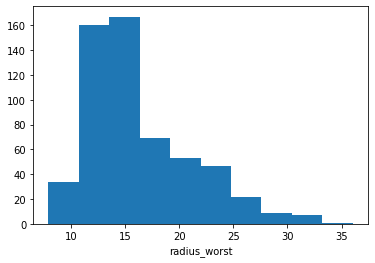

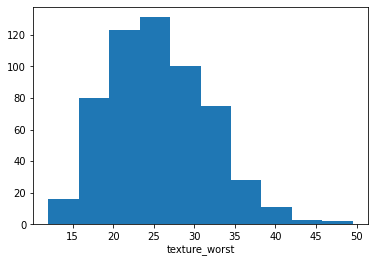

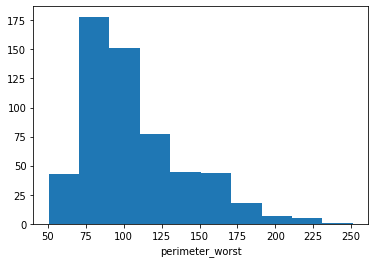

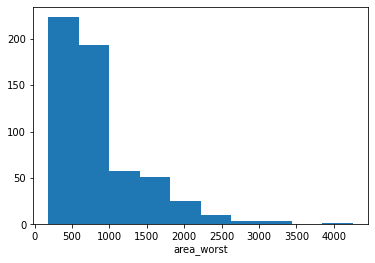

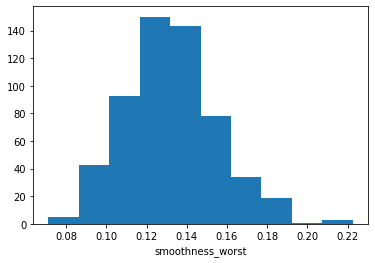

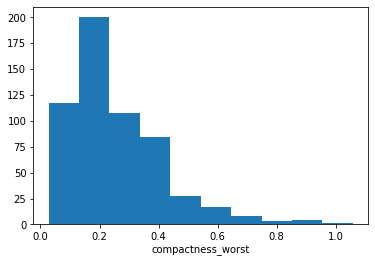

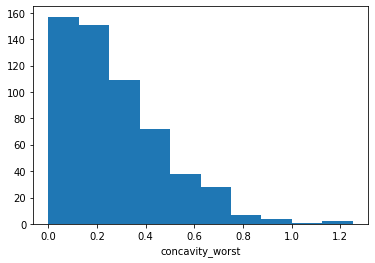

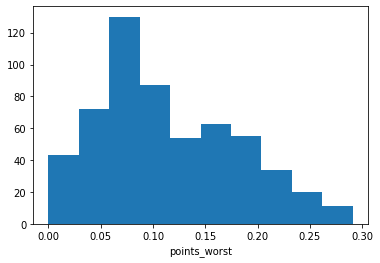

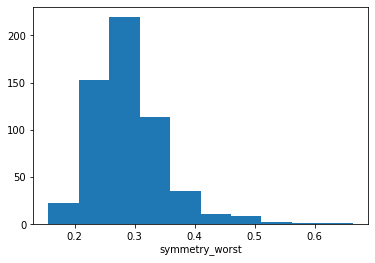

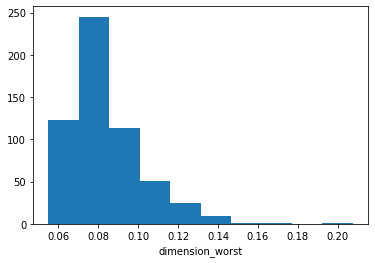

In [ ]:
## plotting all the histograms
for col in data.columns.values:
  if data[col].dtypes != 'object':
    plt.hist(data[col])
    plt.xlabel(col)
    plt.show()

1. There are around 15000 entries with construction year as 0 which implies that the construction year is not known. 

# Correlation Tests!

In [ ]:
#1. Correlation between Numerical Data Columns (using Pearson's and Spearman's correlation)

num_data = [col for col in data.columns.values if data[col].dtypes != 'object']
num_df = data[num_data]

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_enc = LabelEncoder()

data['diagnosis'] = target_enc.fit_transform(data['diagnosis'].astype('str'))  # 0 corresponds to Benign and 1 corresponds to Malignant!
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


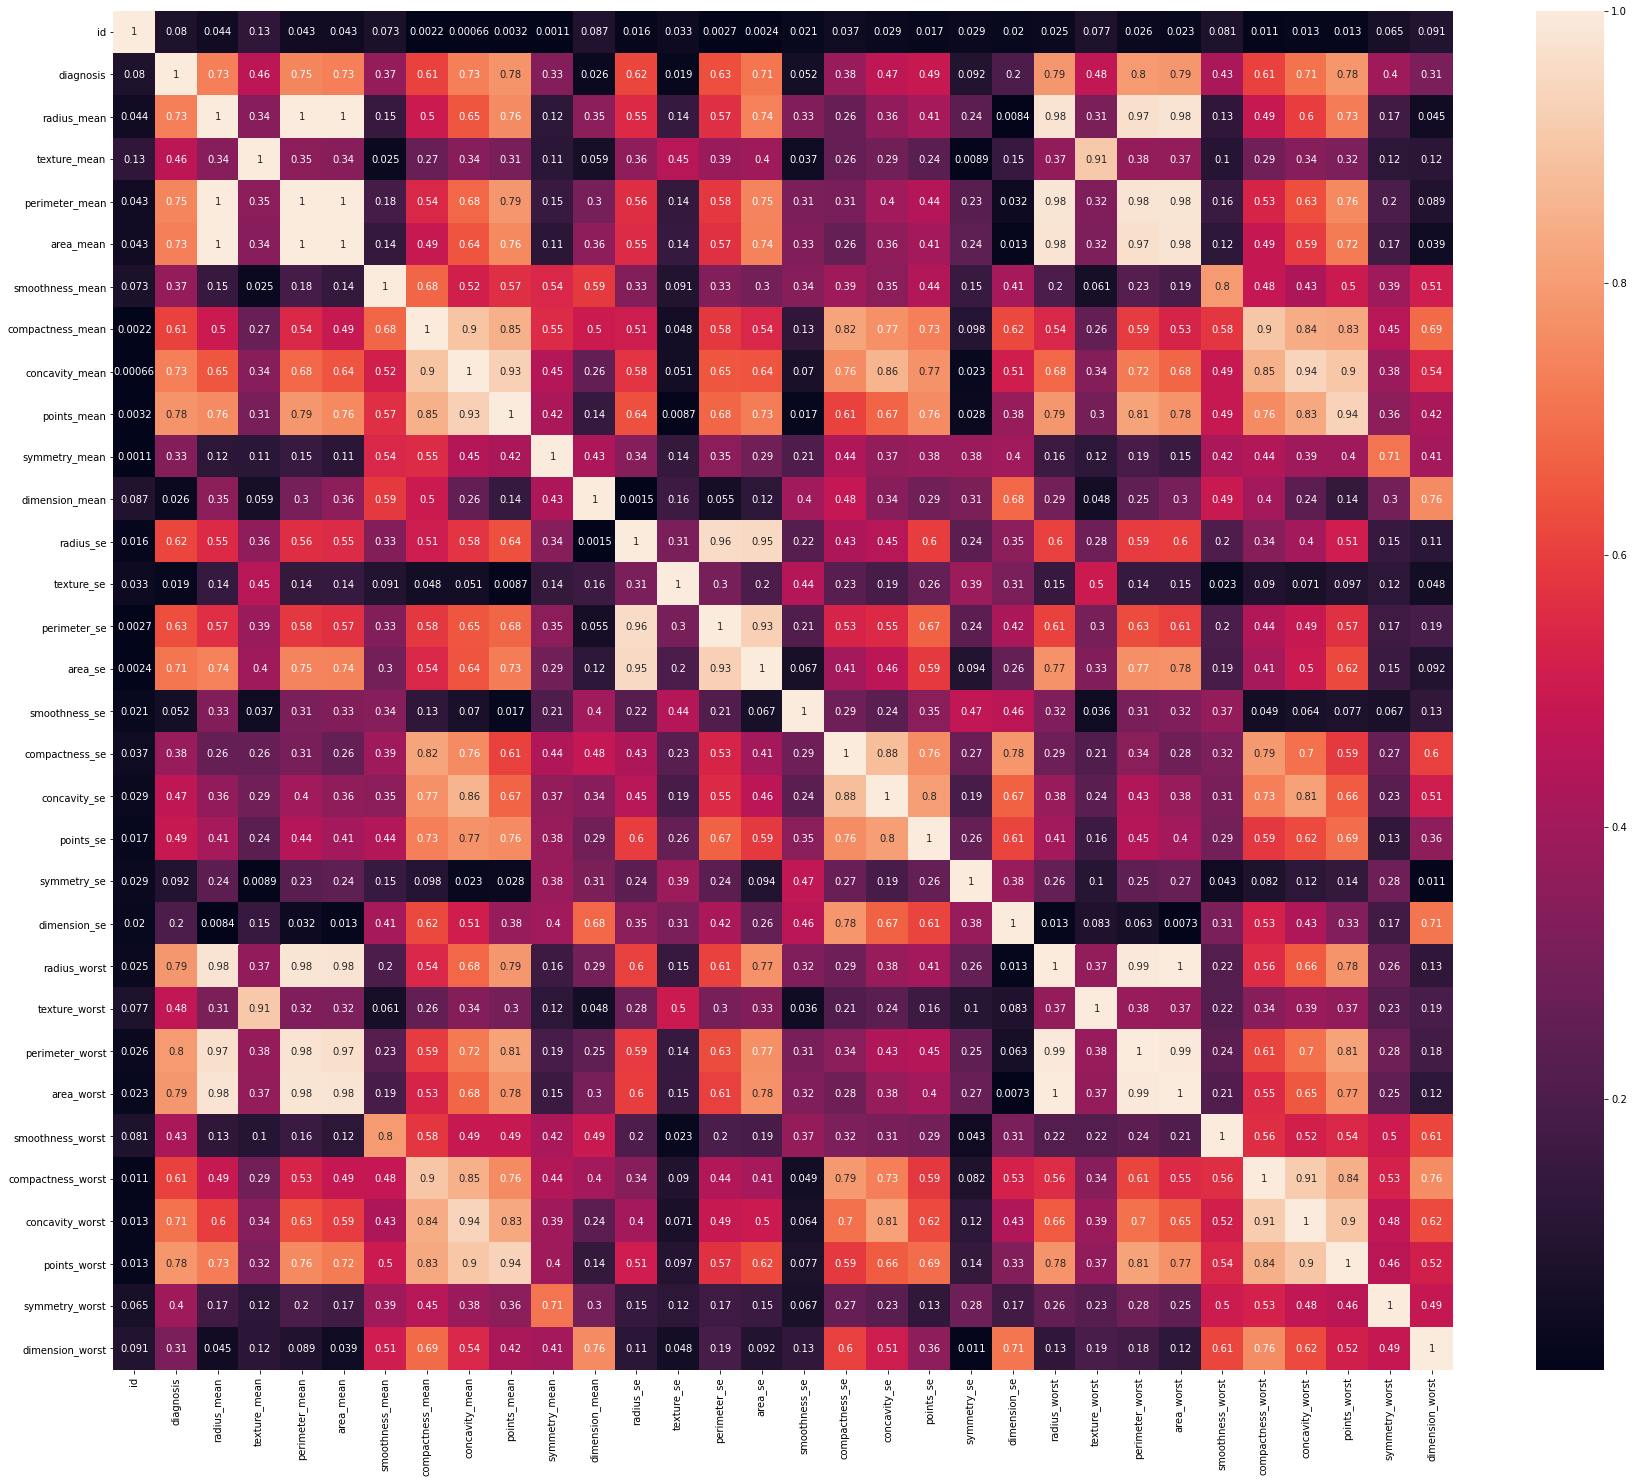

In [ ]:
## Spearman's Correlation

corrMatrix_s = data.corr(method='spearman')
fig, ax = plt.subplots(figsize=(30, 25))
sns.heatmap(abs(corrMatrix_s), annot=True)
plt.show() 

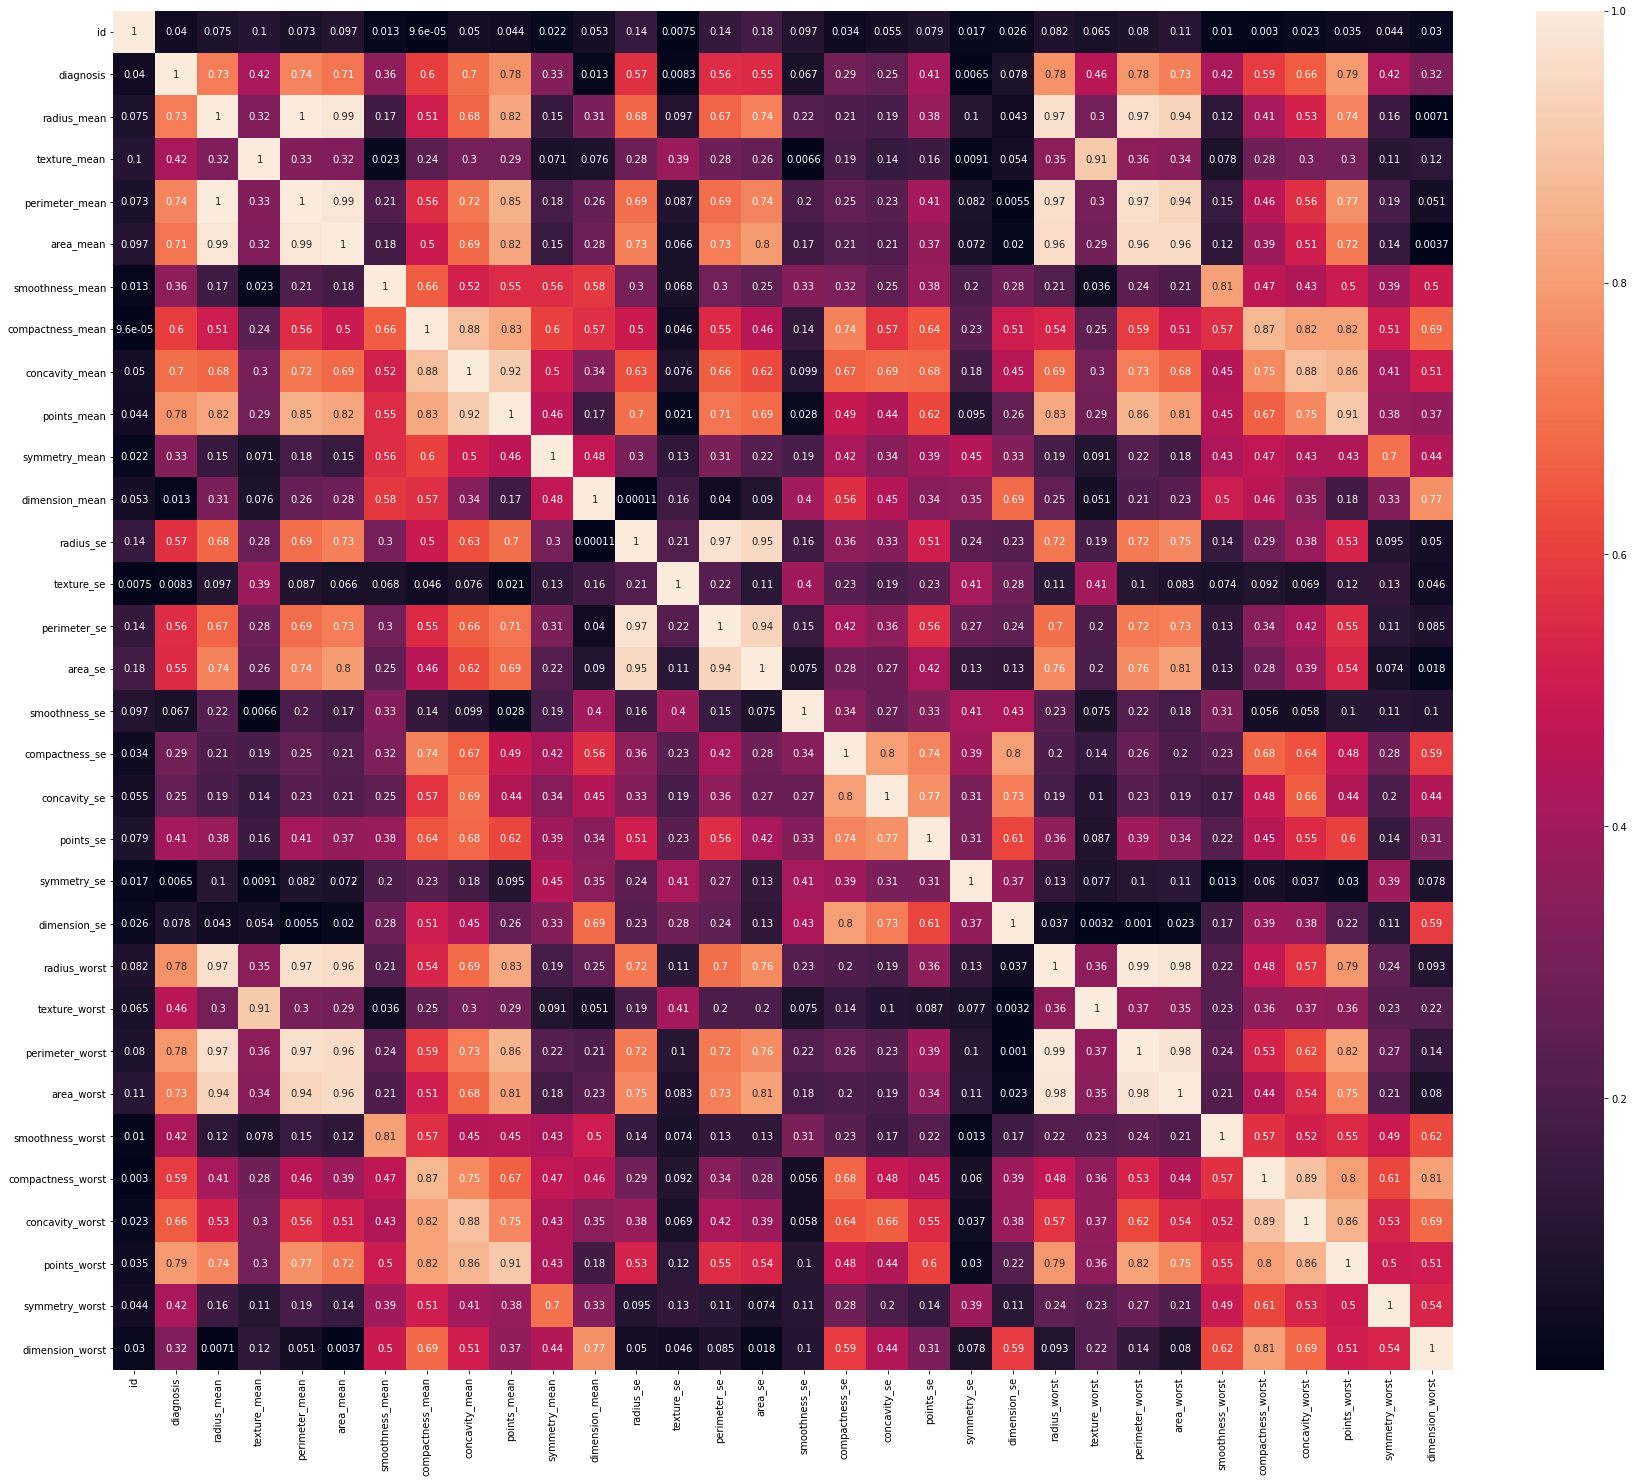

In [ ]:
## Pearson's Correlation

corrMatrix_p = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(30, 25))
sns.heatmap(abs(corrMatrix_p), annot=True)
plt.show() 

None of the numerical features have a good correlation with each other and so feature elimination is not a good idea on this basis.

# Feature Elimination based on above analysis!

It can be assumed intuitively that amount_tsh,	gps_height,	basin,	installer, population,	scheme_management,	construction	year,	 extraction_type,	management_group,	water_quality, payment	type,	source,	and	 waterpoint_type can be very important variables in predicting pump quality.

From above analysis, dimension_mean, texture_se, smoothness_se, symmetry_se, and dimension_se can be removed as they are least correlated with the target variable.

In [ ]:
data_final = data.drop(['id','dimension_mean','texture_se', 'smoothness_se', 'symmetry_se', 'perimeter_mean', 'area_mean'], axis=1)

In [ ]:
data_final.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,points_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,0.10280,0.06981,0.03987,0.03700,0.1959,0.2360,1.670,17.43,0.011800,0.01683,0.012410,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,0.09688,0.11470,0.06387,0.02642,0.1922,0.4505,3.430,27.10,0.035810,0.03354,0.013650,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,0.10770,0.07804,0.03046,0.02480,0.1714,0.1967,1.342,13.54,0.009355,0.01056,0.007483,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,0.11640,0.11360,0.04635,0.04796,0.1771,0.3384,1.851,26.33,0.034980,0.02187,0.019650,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,0.07963,0.06934,0.03393,0.02657,0.1721,0.1783,1.338,17.72,0.014850,0.01551,0.009155,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [ ]:
data_final.shape

(569, 25)

Since the data has a lot of distinct values, Random Forest should ideally perform better for a multi-classification problem. Let's check various models for the same and see if any other model outperforms Random Forest!

# Hyperparameter Tuning on various Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

target_enc = LabelEncoder()
scaler = preprocessing.StandardScaler()
df = data_final

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

radius_mean         -1.012774e-16
texture_mean         2.562053e-16
smoothness_mean     -8.402009e-16
compactness_mean     2.889020e-16
concavity_mean       0.000000e+00
points_mean         -1.787337e-16
symmetry_mean        1.952040e-17
radius_se            1.830038e-17
perimeter_se         3.416071e-16
area_se              1.088263e-16
compactness_se      -1.566512e-16
concavity_se         5.856121e-18
points_se           -6.996845e-17
dimension_se         6.222129e-17
radius_worst        -1.601283e-16
texture_worst        1.019941e-16
perimeter_worst      2.523012e-16
area_worst           4.599495e-17
smoothness_worst    -5.834161e-16
compactness_worst   -2.181405e-16
concavity_worst      1.700715e-16
points_worst         8.155869e-17
symmetry_worst       1.123613e-15
dimension_worst      3.818679e-16
dtype: float64
radius_mean          1.001101
texture_mean         1.001101
smoothness_mean      1.001101
compactness_mean     1.001101
concavity_mean       1.001101
points_mean        

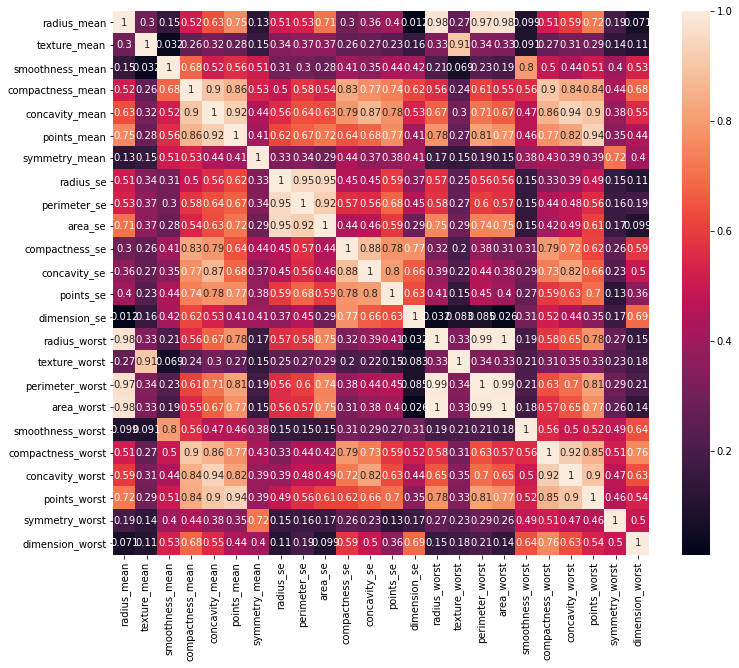

In [ ]:
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_train.columns = X.columns
X_test.columns = X.columns
print(X_train.mean())
print(X_train.std())

corrMatrix = X_train.corr(method='spearman')
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(abs(corrMatrix), annot = True)
plt.show()

As can be seen that the mean of all the columns is now close to 0 and the standard deviation for all the columns is close to 1 after the above cell. So, the data is now stadardised! The scaler fit on the train data is then applied on the validation data next.

In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test))

print('Mean: ')
print(X_test.mean())
print('Standard Deviation: ')
print(X_test.std())

Mean: 
0     0.105515
1    -0.091595
2     0.205521
3     0.093521
4     0.084444
5     0.112314
6     0.133217
7     0.087355
8     0.072857
9     0.089126
10   -0.027474
11   -0.037083
12    0.054371
13    0.035019
14    0.138487
15   -0.092502
16    0.135004
17    0.156917
18    0.216541
19   -0.021159
20    0.029494
21    0.085174
22    0.073439
23    0.009965
dtype: float64
Standard Deviation: 
0     1.014221
1     1.047046
2     1.081030
3     1.050235
4     1.003029
5     1.023779
6     1.099766
7     0.938240
8     0.959864
9     0.882962
10    0.901149
11    0.654181
12    0.951344
13    1.055414
14    1.101083
15    1.050952
16    1.089226
17    1.156698
18    0.989282
19    0.839736
20    0.935260
21    1.009231
22    1.030462
23    0.918801
dtype: float64


So the means of all the columns of validation data are now close to 0 and the standard deviations are close to 1.

## Models

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import f1_score, make_scorer, roc_auc_score

def model_train_and_cv(model, params, cv, X_train, y_train):
  print('Tuning Hyperparameters using GridSearchCV...') 

  f1 = make_scorer(f1_score , average='macro')
  clf = GridSearchCV(model, param_grid=params, scoring=f1, cv=cv)  # Hyperparameter tuning
  clf.fit(X_train, y_train)
  
  print('Best parameters: ')
  print(clf.best_params_)
  print('Best score: ')
  print(clf.best_score_)

  return clf

def test_and_report_error(model_name, X_test, y_test):
  print('Test Classification report:')
  y_true, y_pred = np.squeeze(y_test), model_name.predict(np.array(X_test))
  print(classification_report(y_true, y_pred))

In [ ]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
params = {'n_estimators':[30, 40, 50], 'random_state':[1, 42], 'criterion':['entropy', 'gini']} 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rf = model_train_and_cv(clf_rf, params, cv, X_train, y_train)
test_and_report_error(rf, X_test, y_test)

Tuning Hyperparameters using GridSearchCV...
Best parameters: 
{'criterion': 'gini', 'n_estimators': 40, 'random_state': 1}
Best score: 
0.9552841592667926
Test Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.98      0.94      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# Naive Bayes Classifier. Reference used: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
params = {'var_smoothing': [1e-8, 1e-9, 1e-10]}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

nb = model_train_and_cv(clf_nb, params, cv, X_train, y_train)
test_and_report_error(nb, X_test, y_test)

Tuning Hyperparameters using GridSearchCV...
Best parameters: 
{'var_smoothing': 1e-08}
Best score: 
0.9141412252454636
Test Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.96      0.94      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Tree Based Methods

from sklearn import tree

clf_tree = tree.DecisionTreeClassifier() # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
params = {'criterion': ['gini', 'entropy']}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

tr = model_train_and_cv(clf_tree, params, cv, X_train, y_train)
test_and_report_error(tr, X_test, y_test)

Tuning Hyperparameters using GridSearchCV...
Best parameters: 
{'criterion': 'entropy'}
Best score: 
0.9288481753715933
Test Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       1.00      0.94      0.97        49

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
# Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clf_bag = BaggingClassifier()
params = {'base_estimator':[SVC(), tree.DecisionTreeClassifier()], 'n_estimators':[5, 7, 10], 'random_state': [1, 42]}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

bag = model_train_and_cv(clf_bag, params, cv, X_train, y_train)
test_and_report_error(bag, X_test, y_test)

Tuning Hyperparameters using GridSearchCV...
Best parameters: 
{'base_estimator': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'n_estimators': 10, 'random_state': 42}
Best score: 
0.9637533598718657
Test Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.98      0.94      0.96        49

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# Boosting - AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

params = {"base_estimator__criterion" : ["gini", "entropy"], "base_estimator__splitter" :   ["best", "random"], "n_estimators": [50, 60]}
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced", max_depth = None)
clf_ada = AdaBoostClassifier(base_estimator = DTC)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

ada_boost = model_train_and_cv(clf_ada, params, cv, X_train, y_train)
test_and_report_error(ada_boost, X_test, y_test)

Tuning Hyperparameters using GridSearchCV...
Best parameters: 
{'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 60}
Best score: 
0.9168119024657316
Test Classification report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.96      0.94      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
## Gradient Boosting Classifier. 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

params = {"learning_rate":[0.1, 0.25, 0.5, 1], "n_estimators": [20, 30], "random_state":[0,12]}
# DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced", max_depth = None)
clf_grad = GradientBoostingClassifier(max_features=2, max_depth=2)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grad_boost = model_train_and_cv(clf_grad, params, cv, X_train, y_train)
test_and_report_error(grad_boost, X_test, y_test)

Tuning Hyperparameters using GridSearchCV...
Best parameters: 
{'learning_rate': 0.5, 'n_estimators': 30, 'random_state': 12}
Best score: 
0.9609231717701648
Test Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.98      0.99        49

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
# SVC: Support Vector Machine

from sklearn import svm

clf_svc = svm.SVC()
params = {'kernel':('rbf', 'linear', 'poly'), 'C':[0.1, 1, 10, 100], 'degree':[3,5,8]} # C: different regularization parameters
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

svc = model_train_and_cv(clf_svc, params, cv, X_train, y_train)
test_and_report_error(svc, X_test, y_test)

Tuning Hyperparameters using GridSearchCV...
Best parameters: 
{'C': 0.1, 'degree': 3, 'kernel': 'linear'}
Best score: 
0.975889920737436
Test Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.98      0.98      0.98        49

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Multi Layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

clf_NN = MLPClassifier(solver='lbfgs', random_state=1, max_iter=2500, hidden_layer_sizes=(5,2))
params = {'alpha':[1e-5, 1e-2, 1, 10]}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

NN = model_train_and_cv(clf_NN, params, cv, X_train, y_train)
test_and_report_error(NN, X_test, y_test)

Tuning Hyperparameters using GridSearchCV...
Best parameters: 
{'alpha': 10}
Best score: 
0.9752611566619166
Test Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.98      0.98      0.98        49

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Importance of different features

In [ ]:
def feature_imp(model_name):
  dset = pd.DataFrame()
  dset['attr'] = data_final.drop(['diagnosis'], axis=1).columns
  dset['importance'] = model_name.best_estimator_.feature_importances_
  
  dset = dset.sort_values(by='importance', ascending=False)

  plt.figure(figsize=(16, 14))
  plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
  plt.title('Feature Importances', fontsize=20, fontweight='bold', pad=20)
  plt.xlabel('Importance', fontsize=14, labelpad=20)
  plt.show()

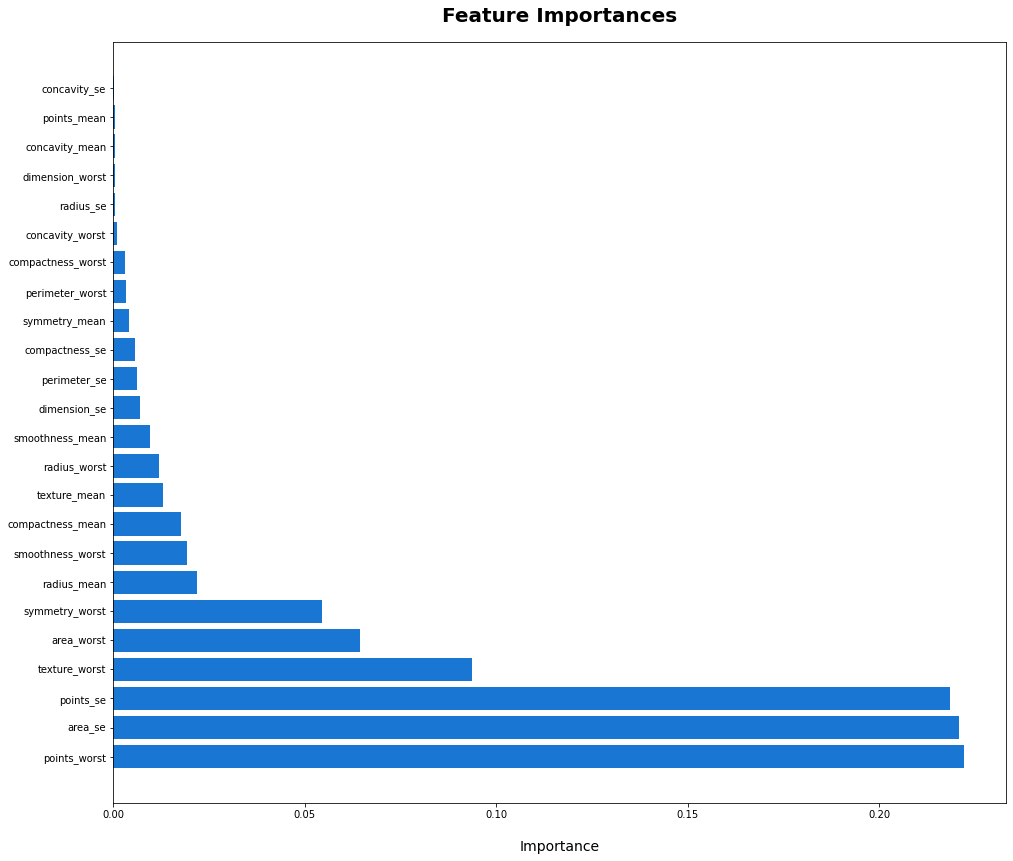

In [ ]:
feature_imp(grad_boost)

## Visualisation of Decision Boundaries

In [ ]:
X_train.shape

(455, 24)

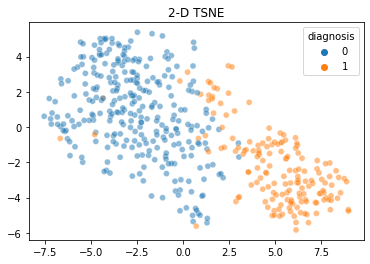

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100)
tsne_dims = tsne.fit_transform(np.array(X_train))

sns.scatterplot(x=tsne_dims[:,0], y=tsne_dims[:,1], alpha=.5, hue=y_train)
plt.title('2-D TSNE')
plt.show()

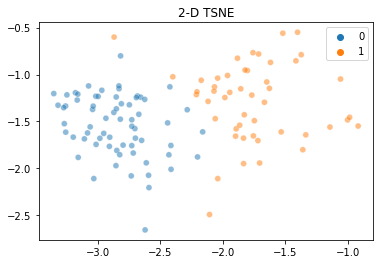

In [ ]:
tsne = TSNE(n_components=2, perplexity=100)
tsne_dims = tsne.fit_transform(np.array(X_test))
y_pred = nb.predict(X_test)
sns.scatterplot(x=tsne_dims[:,0], y=tsne_dims[:,1], alpha=.5, hue=y_pred)
plt.title('2-D TSNE')
plt.show()

# References Used:
https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/